# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `3` | `Questions`

> "Hi Team! 👋

> Here we go again! The current script is prepared to help you to further exercise course content (But, again, do note that these are not assessment questions. They are for your exercise.)

> Some of the questions ask you to perform `reverse-engineering` 🧩. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Computational Finance. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps 😊

> Enjoy!

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd
import polars as pl

import matplotlib.pyplot as plt
from lets_plot import *

import datetime

import warnings
warnings.filterwarnings("ignore")

# %%timeit -n 1000 -r 5

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You may use `yfinance` library.

In [2]:
import yfinance as yf

> Let's start & end dates--we are interested in year ~~2021~~ <font color = 'red'> 2024 </font> until August.

In [3]:
start: datetime = datetime.datetime(2024, 1, 1)
end: datetime = datetime.datetime(2024, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [4]:
apple: pd.DataFrame =\
(    yf
     .download("AAPL",
               start,
               end)
)

google: pd.DataFrame =\
(    yf
     .download("GOOGL", 
               start,
               end)
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


>### <font color = 'yellow'> POLARS </font>

In [5]:
apple_pl: pl.DataFrame = (
    pl.from_pandas(
        apple
        .reset_index()
    )
    .with_columns(
        pl.col('Date')
        .cast(pl.Date)
    )
)

google_pl: pl.DataFrame = (
    pl.from_pandas(
        google
        .reset_index()
    )
    .with_columns(
        pl.col('Date')
        .cast(pl.Date)
    )
)

> You may save the data to csv files.

In [6]:
apple.to_csv("apple_2024_stock.csv")
google.to_csv("google_2024_stock.csv")

#### Have a quick look at your data.

In [7]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500


In [8]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200
2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100
2024-01-04,138.419998,139.160004,136.350006,136.389999,136.053101,27137700
2024-01-05,136.750000,137.160004,135.149994,135.729996,135.394745,22506000
2024-01-08,136.289993,139.009995,136.259995,138.839996,138.497055,21404000


In [9]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02
mean,194.252380,196.172500,192.514821,194.389583,194.020255,6.168830e+07
std,20.554547,20.896348,20.132660,20.590587,20.712093,2.820863e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,3.029900e+07
25%,176.825001,178.592499,174.869999,178.139999,177.693027,4.596918e+07
50%,188.735001,190.285004,187.360001,188.740005,188.146545,5.353515e+07
75%,214.119995,216.962498,211.932499,214.252502,214.004791,6.862602e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [10]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02
mean,160.070476,161.745238,158.608928,160.225476,159.898376,2.762492e+07
std,15.661862,15.742355,15.547389,15.605793,15.629485,1.091537e+07
min,131.880005,133.240005,130.669998,131.399994,131.075424,1.024210e+07
25%,145.875000,146.632500,144.920006,145.977505,145.616940,2.103315e+07
50%,160.504997,163.440002,158.764999,160.834999,160.621857,2.448235e+07
75%,174.189995,175.357502,172.090000,173.610001,173.181171,3.117152e+07
max,190.309998,191.750000,189.029999,191.179993,190.926636,7.191000e+07


### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

> Let's obtain Apple adjusted close data for July and August ~~2021~~ <font color = 'red'> 2024 </font>

In [11]:
apple_07_pd: pd.DataFrame = (
    apple
    [apple.index.month == 7]
    [['Adj Close']]
)

apple_07_pd.head()

,Adj Close
Date,
2024-07-01,216.499405
2024-07-02,220.015335
2024-07-03,221.293854
2024-07-05,226.078308
2024-07-08,227.556610


>### <font color = 'yellow'> POLARS </font>

In [12]:
apple_07_pl: pl.DataFrame = (
    apple_pl
    .filter(
        pl.col('Date')
        .dt
        .month()
        == 7       
    )
    .select(
        ['Date', 'Adj Close']
    )
)

apple_07_pl.head()

Date,Adj Close
date,f64
2024-07-01,216.499405
2024-07-02,220.015335
2024-07-03,221.293854
2024-07-05,226.078308
2024-07-08,227.55661


> <font color = 'orange'> Comparison of Compute Time </font> \
> <font color = 'yellow'> Polars </font> is `~5 times` faster than pandas when filtering

In [94]:
%%timeit -n 1000 -r 5
apple_07_pd: pd.DataFrame = (
    apple
    [apple.index.month == 7]
    [['Adj Close']]
)

apple_07_pd.head()

1.75 ms ± 148 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [95]:
%%timeit -n 1000 -r 5
apple_07_pl: pl.DataFrame = (
    apple_pl
    .filter(
        pl.col('Date')
        .dt
        .month()
        == 7       
    )
    .select(
        ['Date', 'Adj Close']
    )
)

apple_07_pl.head()

375 µs ± 44.8 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [13]:
apple_08_pd: pd.DataFrame = (
    apple
    [apple.index.month == 8]
    [['Adj Close']]
)

apple_08_pd.head()

,Adj Close
Date,
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061
2024-08-06,206.990402
2024-08-07,209.577423


>### <font color = 'yellow'> POLARS </font>

In [14]:
apple_08_pl: pl.DataFrame = (
    apple_pl
    .filter(
        pl.col('Date')
        .dt
        .month()
        == 8
    )
    .select(
        ['Date', 'Adj Close']
    )
)

apple_08_pl.head()

Date,Adj Close
date,f64
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061
2024-08-06,206.990402
2024-08-07,209.577423


### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

In [15]:
pd.concat(
    [
        apple_07_pd.head(3),
        apple_08_pd.head(3)
    ],
    axis = 0
)

,Adj Close
Date,
2024-07-01,216.499405
2024-07-02,220.015335
2024-07-03,221.293854
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061


>### <font color = 'yellow'> POLARS </font>

In [16]:
pl.concat(
    [
        apple_07_pl.head(3),
        apple_08_pl.head(3)
    ],
    how = 'vertical'
)

Date,Adj Close
date,f64
2024-07-01,216.499405
2024-07-02,220.015335
2024-07-03,221.293854
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061


> <font color = 'orange'> Comparison of Compute Time </font> \
> <font color = 'yellow'> Polars </font> is `~18 times` faster than pandas when concatenating

In [96]:
%%timeit -n 1000 -r 5
pd.concat(
    [
        apple_07_pd.head(3),
        apple_08_pd.head(3)
    ],
    axis = 0
)

1.19 ms ± 224 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [97]:
%%timeit -n 1000 -r 5
pl.concat(
    [
        apple_07_pl.head(3),
        apple_08_pl.head(3)
    ],
    how = 'vertical'
)

66 µs ± 9.4 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


#### Question 1-2. How would you extract only the ~~2021~~ <font color = 'red'> 2024 </font> August GOOGL values?

In [17]:
google_08_pd: pd.DataFrame = (
    google
    [
        (google.index.month == 8)
        &
        (google.index.year == 2024)
    ]
    [['Adj Close']]
)

google_08_pd

,Adj Close
Date,
2024-08-01,170.533707
2024-08-02,166.439148
2024-08-05,159.038971
2024-08-06,158.080231
2024-08-07,158.729370
2024-08-08,161.815277
2024-08-09,163.453110
2024-08-12,162.074921
2024-08-13,163.942459


>### <font color = 'yellow'> POLARS </font>

In [18]:
google_08_pl: pl.DataFrame = (
    google_pl
    .filter(
        pl.col('Date')
        .dt
        .year()
        == 2024,
        pl.col('Date')
        .dt
        .month()
        == 8
    )
    .select(
        ['Date', 'Adj Close']
    )
)

google_08_pl

Date,Adj Close
date,f64
2024-08-01,170.533707
2024-08-02,166.439148
2024-08-05,159.038971
2024-08-06,158.080231
2024-08-07,158.72937
…,…
2024-08-26,165.939804
2024-08-27,164.461761
2024-08-28,162.634201


#### Question 1-3. Please concatenate the AAPL and GOOGL ~~2021~~ <font color = 'red'> 2024 </font> August stock data--there will be duplicate index labels

In [19]:
apple_google_08_pd: pd.DataFrame = (
    pd.concat(
        [
            apple_08_pd.head(3),
            google_08_pd.head(3)
        ],
        axis = 0
    )
)

apple_google_08_pd.head(8)

,Adj Close
Date,
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061
2024-08-01,170.533707
2024-08-02,166.439148
2024-08-05,159.038971


>### <font color = 'yellow'> POLARS </font>

In [20]:
apple_google_08_pl: pl.DataFrame = (
    pl.concat(
        [
            apple_08_pl.head(3),
            google_08_pl.head(3)
        ],
        how = 'vertical'
    )
)

apple_google_08_pl

Date,Adj Close
date,f64
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061
2024-08-01,170.533707
2024-08-02,166.439148
2024-08-05,159.038971


> Let's see the `two records for data of 2024-08-02`

In [21]:
(
    apple_google_08_pd
    [
        apple_google_08_pd.index == '2024-08-02'
    ]
)

,Adj Close
Date,
2024-08-02,219.605804
2024-08-02,166.439148


>### <font color = 'yellow'> POLARS </font>

In [22]:
(
    apple_google_08_pl
    .filter(
        pl.col('Date')
        ==
        pl.lit('2024-08-02')
        .str
        .strptime(pl.Date, '%Y-%m-%d')
    )
)

Date,Adj Close
date,f64
2024-08-02,219.605804
2024-08-02,166.439148


#### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

In [23]:
apple_google_08_pd: pd.DataFrame = (
    pd.concat(
        [
            apple_08_pd,
            google_08_pd
        ],
        axis = 0,
        keys = ['AAPL', 'GOOGL']
    )
)

(
    apple_google_08_pd
    .groupby(level = 0)
    .head(3)
)

Adj Close
      Date                  
AAPL  2024-08-01  218.107544
      2024-08-02  219.605804
      2024-08-05  209.028061
GOOGL 2024-08-01  170.533707
      2024-08-02  166.439148
      2024-08-05  159.038971

> Let's extract just GOOGL values using `.loc`

In [24]:
(
    apple_google_08_pd
    .loc
    ['GOOGL'] # Single label interpreted as a label of the index
    .head(3)
)

,Adj Close
Date,
2024-08-01,170.533707
2024-08-02,166.439148
2024-08-05,159.038971


#### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

In [25]:
pd.concat(
    [
        apple[['Adj Close', 'Volume']],
        google[['Adj Close', 'Volume']]
    ],
    axis = 0
)

,Adj Close,Volume
Date,,
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222336,71983600
2024-01-05,180.495071,62303300
2024-01-08,184.858521,59144500
...,...,...
2024-08-26,165.939804,14190400
2024-08-27,164.461761,11821900
2024-08-28,162.634201,16407400


>### <font color = 'yellow'> POLARS </font>

In [26]:
pl.concat(
    [
        apple_pl.select(['Date', 'Adj Close', 'Volume']),
        google_pl.select(['Date', 'Adj Close', 'Volume'])
    ],
    how = 'vertical'
)

Date,Adj Close,Volume
date,f64,i64
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222336,71983600
2024-01-05,180.495071,62303300
2024-01-08,184.858521,59144500
…,…,…
2024-08-26,165.939804,14190400
2024-08-27,164.461761,11821900
2024-08-28,162.634201,16407400


> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

In [27]:
pd.concat(
    [
        apple[['Adj Close', 'Volume']],
        google[['Adj Close']]
    ],
    axis = 0
)

,Adj Close,Volume
Date,,
2024-01-02,184.938217,82488700.0
2024-01-03,183.553467,58414500.0
2024-01-04,181.222336,71983600.0
2024-01-05,180.495071,62303300.0
2024-01-08,184.858521,59144500.0
...,...,...
2024-08-26,165.939804,NaN
2024-08-27,164.461761,NaN
2024-08-28,162.634201,NaN


>### <font color = 'yellow'> POLARS </font>

In [28]:
pl.concat(
    [
        apple_pl.select(['Date', 'Adj Close', 'Volume']),
        google_pl.select(['Date', 'Adj Close'])
    ],
    how = 'diagonal'
)

Date,Adj Close,Volume
date,f64,i64
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222336,71983600
2024-01-05,180.495071,62303300
2024-01-08,184.858521,59144500
…,…,…
2024-08-26,165.939804,null
2024-08-27,164.461761,null
2024-08-28,162.634201,null


### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

In [29]:
pd.concat(
    [
        apple[['Adj Close', 'Volume']],
        google[['Adj Close']]
    ],
    join = 'inner'
)

,Adj Close
Date,
2024-01-02,184.938217
2024-01-03,183.553467
2024-01-04,181.222336
2024-01-05,180.495071
2024-01-08,184.858521
...,...
2024-08-26,165.939804
2024-08-27,164.461761
2024-08-28,162.634201


#### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

In [30]:
pd.concat(
    [
        apple[['Adj Close']],
        google[['Adj Close']]
    ],
    axis = 1
)

,Adj Close,Adj Close
Date,,
2024-01-02,184.938217,137.828705
2024-01-03,183.553467,138.576859
2024-01-04,181.222336,136.053101
2024-01-05,180.495071,135.394745
2024-01-08,184.858521,138.497055
...,...,...
2024-08-26,227.179993,165.939804
2024-08-27,228.029999,164.461761
2024-08-28,226.490005,162.634201


>### <font color = 'yellow'> POLARS </font>
> polars does not allow duplicate columns names

In [31]:
pl.concat(
    [
        apple_pl.select(['Adj Close']),
        google_pl.select(['Adj Close'])
    ],
    how = 'horizontal'
)

DuplicateError: unable to hstack, column with name "Adj Close" already exists

#### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

#### This demonstrates how NaN values will be filled in those rows for `apple` which only has three rows as compared to 5 for `google`

In [32]:
columns: pd.MultiIndex = (
    pd.MultiIndex
    .from_tuples(
        [
            ('AAPL', 'Adj Close'),
            ('AAPL', 'Volume'),
            ('GOOGL', 'Adj Close'),
            ('GOOGL', 'Volume'),
        ]
    )
)

diff_rows_pd_CONCAT: pd.DataFrame = (
    pd.concat(
        [
            apple[['Adj Close', 'Volume']].head(5),
            google[['Adj Close', 'Volume']].head(3)
        ],
        axis = 1
    )
)

diff_rows_pd_CONCAT.columns = columns

diff_rows_pd_CONCAT

AAPL                 GOOGL            
             Adj Close    Volume   Adj Close      Volume
Date                                                    
2024-01-02  184.938217  82488700  137.828705  23711200.0
2024-01-03  183.553467  58414500  138.576859  24212100.0
2024-01-04  181.222336  71983600  136.053101  27137700.0
2024-01-05  180.495071  62303300         NaN         NaN
2024-01-08  184.858521  59144500         NaN         NaN

#### Question 2-4. You know that `inner join` can also be used `along this axis`. 

#### Please include rows with index labels that do not exist in both DataFrame objects

In [33]:
apple_columns_MERGE: pd.MultiIndex = (
    pd.MultiIndex
    .from_tuples(
        [
            ('AAPL', 'Adj Close'),
            ('AAPL', 'Volume')
        ]
    )
)

apple_MERGE: pd.DataFrame = (
    apple
    [['Adj Close', 'Volume']]
    .head(5)
    .copy()
)
apple_MERGE.columns = apple_columns_MERGE

google_columns_MERGE: pd.MultiIndex = (
    pd.MultiIndex
    .from_tuples(
        [
            ('GOOGL', 'Adj Close'),
            ('GOOGL', 'Volume'),
        ]
    )
)

google_MERGE: pd.DataFrame = (
    google
    [['Adj Close', 'Volume']]
    .head(3)
    .copy()
)
google_MERGE.columns = google_columns_MERGE

diff_rows_pd_MERGE: pd.DataFrame = (
    apple_MERGE
    .merge(
            google_MERGE,
            how = 'inner',
            left_index = True,
            right_index = True
        )
    )

diff_rows_pd_MERGE

AAPL                 GOOGL          
             Adj Close    Volume   Adj Close    Volume
Date                                                  
2024-01-02  184.938217  82488700  137.828705  23711200
2024-01-03  183.553467  58414500  138.576859  24212100
2024-01-04  181.222336  71983600  136.053101  27137700

#### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

In [34]:
pd.concat(
    [
        apple[['Adj Close']].head(3),
        google[['Adj Close']].head(3)
    ],
    axis = 0,
    ignore_index = True
)

,Adj Close
0,184.938217
1,183.553467
2,181.222336
3,137.828705
4,138.576859
5,136.053101


>### <font color = 'yellow'> POLARS </font>

In [35]:
pl.concat(
    [
        apple_pl[['Adj Close']].head(3),
        google_pl[['Adj Close']].head(3)
    ],
    how = 'vertical'
)

Adj Close
f64
184.938217
183.553467
181.222336
137.828705
138.576859
136.053101


### `Now let's merging DataFrame objects`

In [36]:
apple_price: pd.DataFrame = (
    apple
    [['Adj Close']]
    .reset_index()
)

apple_price

,Date,Adj Close
0,2024-01-02,184.938217
1,2024-01-03,183.553467
2,2024-01-04,181.222336
3,2024-01-05,180.495071
4,2024-01-08,184.858521
...,...,...
163,2024-08-26,227.179993
164,2024-08-27,228.029999
165,2024-08-28,226.490005
166,2024-08-29,229.789993


>### <font color = 'yellow'> POLARS </font>

In [37]:
apple_price_pl: pl.DataFrame = (
    pl.from_pandas(
        apple
        [['Adj Close']]
        .reset_index()
    )
    .with_columns(
        pl.col('Date')
        .cast(pl.Date)
    )
)
apple_price_pl

Date,Adj Close
date,f64
2024-01-02,184.938217
2024-01-03,183.553467
2024-01-04,181.222336
2024-01-05,180.495071
2024-01-08,184.858521
…,…
2024-08-26,227.179993
2024-08-27,228.029999
2024-08-28,226.490005


### Question 3-1. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrames.

In [38]:
apple_volume: pd.DataFrame = (
    apple
    [['Volume']]
    .reset_index()
)

apple_volume

,Date,Volume
0,2024-01-02,82488700
1,2024-01-03,58414500
2,2024-01-04,71983600
3,2024-01-05,62303300
4,2024-01-08,59144500
...,...,...
163,2024-08-26,30602200
164,2024-08-27,35934600
165,2024-08-28,38052200
166,2024-08-29,51906300


>### <font color = 'yellow'> POLARS </font>

In [39]:
apple_volume_pl: pl.DataFrame = (
    pl.from_pandas(
        apple
        [['Volume']]
        .reset_index()
    )
    .with_columns(
        pl.col('Date')
        .cast(pl.Date)
    )
)

apple_volume_pl

Date,Volume
date,i64
2024-01-02,82488700
2024-01-03,58414500
2024-01-04,71983600
2024-01-05,62303300
2024-01-08,59144500
…,…
2024-08-26,30602200
2024-08-27,35934600
2024-08-28,38052200


In [40]:
(
    apple_price
    .merge(
        apple_volume,
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
    .head()
)

,Date,Adj Close,Volume
0,2024-01-02,184.938217,82488700
1,2024-01-03,183.553467,58414500
2,2024-01-04,181.222336,71983600
3,2024-01-05,180.495071,62303300
4,2024-01-08,184.858521,59144500


>### <font color = 'yellow'> POLARS </font>

In [41]:
(
    apple_price_pl
    .join(
        apple_volume_pl,
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
    .head()
)

Date,Adj Close,Volume
date,f64,i64
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222336,71983600
2024-01-05,180.495071,62303300
2024-01-08,184.858521,59144500


> <font color = 'orange'> Comparison of Compute Time </font> \
> <font color = 'yellow'> Polars </font> is `~22 times` faster than pandas when merging

In [98]:
%%timeit -n 1000 -r 5
(
    apple_price
    .merge(
        apple_volume,
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
    .head()
)

4.96 ms ± 1.05 ms per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [99]:
%%timeit -n 1000 -r 5
(
    apple_price_pl
    .join(
        apple_volume_pl,
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
    .head()
)

229 µs ± 52.6 µs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


#### Question 3-2. Please use the merge function to create the below.

In [42]:
(
    apple_price
    .merge(
        apple_volume,
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
    .iloc[2 : 4, : ]
    .reset_index(drop = True)
)

,Date,Adj Close,Volume
0,2024-01-04,181.222336,71983600
1,2024-01-05,180.495071,62303300


>### <font color = 'yellow'> POLARS </font>

In [43]:
(
    apple_price_pl
    .join(
        apple_volume_pl,
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
    [2 : 4, : ]
)

Date,Adj Close,Volume
date,f64,i64
2024-01-04,181.222336,71983600
2024-01-05,180.495071,62303300


#### Question 3-3. How would you create the below then?

In [44]:
(
    apple_price
    .head(5)
    .merge(
        apple_volume.iloc[2 : 4, : ],
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
    .reset_index(drop = True)
)

,Date,Adj Close,Volume
0,2024-01-02,184.938217,NaN
1,2024-01-03,183.553467,NaN
2,2024-01-04,181.222336,71983600.0
3,2024-01-05,180.495071,62303300.0
4,2024-01-08,184.858521,NaN


>### <font color = 'yellow'> POLARS </font>

In [45]:
(
    apple_price_pl
    .head(5)
    .join(
        apple_volume_pl[2 : 4, : ],
        how = 'left',
        left_on = 'Date',
        right_on = 'Date'
    )
)

Date,Adj Close,Volume
date,f64,i64
2024-01-02,184.938217,null
2024-01-03,183.553467,null
2024-01-04,181.222336,71983600
2024-01-05,180.495071,62303300
2024-01-08,184.858521,null


### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

In [46]:
pivot_apple: pd.DataFrame = apple.copy()
pivot_apple['Symbol'] = 'AAPL'

pivot_google: pd.DataFrame = google.copy()
pivot_google['Symbol'] = 'GOOGL'

print(pivot_apple, pivot_google)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  184.938217   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.553467   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.222336   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.495071   
2024-01-08  182.089996  185.600006  181.500000  185.559998  184.858521   
...                ...         ...         ...         ...         ...   
2024-08-26  226.759995  227.279999  223.889999  227.179993  227.179993   
2024-08-27  226.000000  228.850006  224.889999  228.029999  228.029999   
2024-08-28  227.919998  229.860001  225.679993  226.490005  226.490005   
2024-08-29  230.100006  232.919998  228.880005  229.789993  229.789993   
2024-08-30  230.190002  230.399994  227.479996  229.000000  229.000000   

              Volume Symbol  
Date   

### ***<font color = 'red'> BUT Symbol is at the end </font>***

In [47]:
pivot_apple: pd.DataFrame = apple.copy()
pivot_apple.insert(loc = 0, column = 'Symbol', value = 'AAPL')

pivot_google: pd.DataFrame = google.copy()
pivot_google.insert(loc = 0, column = 'Symbol', value = 'GOOGL')

print(pivot_apple, pivot_google)

           Symbol        Open        High         Low       Close   Adj Close  \
Date                                                                            
2024-01-02   AAPL  187.149994  188.440002  183.889999  185.639999  184.938217   
2024-01-03   AAPL  184.220001  185.880005  183.429993  184.250000  183.553467   
2024-01-04   AAPL  182.149994  183.089996  180.880005  181.910004  181.222336   
2024-01-05   AAPL  181.990005  182.759995  180.169998  181.179993  180.495071   
2024-01-08   AAPL  182.089996  185.600006  181.500000  185.559998  184.858521   
...           ...         ...         ...         ...         ...         ...   
2024-08-26   AAPL  226.759995  227.279999  223.889999  227.179993  227.179993   
2024-08-27   AAPL  226.000000  228.850006  224.889999  228.029999  228.029999   
2024-08-28   AAPL  227.919998  229.860001  225.679993  226.490005  226.490005   
2024-08-29   AAPL  230.100006  232.919998  228.880005  229.789993  229.789993   
2024-08-30   AAPL  230.19000

>### <font color = 'yellow'> POLARS </font>

In [48]:
pivot_apple_pl: pl.DataFrame = apple_pl.clone()
(
    pivot_apple_pl
    .insert_column(
        index = 1,
        column = pl.Series(
            name = 'Symbol', 
            values = ['AAPL'] * len(apple_pl)
        )
    )
)

pivot_google_pl: pl.DataFrame = google_pl.clone()
(
    pivot_google_pl
    .insert_column(
        index = 1,
        column = pl.Series(
            name = 'Symbol', 
            values = ['GOOGL'] * len(google_pl)
        )
    )
)

print(pivot_apple_pl, pivot_google_pl)

shape: (168, 8)
┌────────────┬────────┬────────────┬────────────┬────────────┬────────────┬────────────┬──────────┐
│ Date       ┆ Symbol ┆ Open       ┆ High       ┆ Low        ┆ Close      ┆ Adj Close  ┆ Volume   │
│ ---        ┆ ---    ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---      │
│ date       ┆ str    ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64      │
╞════════════╪════════╪════════════╪════════════╪════════════╪════════════╪════════════╪══════════╡
│ 2024-01-02 ┆ AAPL   ┆ 187.149994 ┆ 188.440002 ┆ 183.889999 ┆ 185.639999 ┆ 184.938217 ┆ 82488700 │
│ 2024-01-03 ┆ AAPL   ┆ 184.220001 ┆ 185.880005 ┆ 183.429993 ┆ 184.25     ┆ 183.553467 ┆ 58414500 │
│ 2024-01-04 ┆ AAPL   ┆ 182.149994 ┆ 183.089996 ┆ 180.880005 ┆ 181.910004 ┆ 181.222336 ┆ 71983600 │
│ 2024-01-05 ┆ AAPL   ┆ 181.990005 ┆ 182.759995 ┆ 180.169998 ┆ 181.179993 ┆ 180.495071 ┆ 62303300 │
│ 2024-01-08 ┆ AAPL   ┆ 182.089996 ┆ 185.600006 ┆ 181.5      ┆ 185.559998 ┆ 184.8585

#### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

In [49]:
apple_google_CONCAT: pd.DataFrame = (
    pd.concat(
        [
            pivot_apple,
            pivot_google
        ],
        axis = 0
    )
    .sort_index()
)

apple_google_CONCAT

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-01-02,AAPL,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-02,GOOGL,138.550003,139.449997,136.479996,138.169998,137.828705,23711200
2024-01-03,GOOGL,137.250000,139.630005,137.080002,138.919998,138.576859,24212100
2024-01-03,AAPL,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,AAPL,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
...,...,...,...,...,...,...,...
2024-08-28,AAPL,227.919998,229.860001,225.679993,226.490005,226.490005,38052200
2024-08-29,GOOGL,164.309998,165.970001,160.250000,161.779999,161.565613,19699800
2024-08-29,AAPL,230.100006,232.919998,228.880005,229.789993,229.789993,51906300


>### <font color = 'yellow'> POLARS </font>

In [50]:
apple_google_CONCAT_pl: pl.DataFrame = (
    pl.concat(
        [
            pivot_apple_pl,
            pivot_google_pl
        ],
        how = 'vertical'
    )
    .sort(by = 'Date')
)

apple_google_CONCAT_pl

Date,Symbol,Open,High,Low,Close,Adj Close,Volume
date,str,f64,f64,f64,f64,f64,i64
2024-01-02,"""AAPL""",187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-02,"""GOOGL""",138.550003,139.449997,136.479996,138.169998,137.828705,23711200
2024-01-03,"""AAPL""",184.220001,185.880005,183.429993,184.25,183.553467,58414500
2024-01-03,"""GOOGL""",137.25,139.630005,137.080002,138.919998,138.576859,24212100
2024-01-04,"""AAPL""",182.149994,183.089996,180.880005,181.910004,181.222336,71983600
…,…,…,…,…,…,…,…
2024-08-28,"""GOOGL""",165.039993,165.600006,161.529999,162.850006,162.634201,16407400
2024-08-29,"""AAPL""",230.100006,232.919998,228.880005,229.789993,229.789993,51906300
2024-08-29,"""GOOGL""",164.309998,165.970001,160.25,161.779999,161.565613,19699800


#### Question 4-3. Please pushes the index into a column and resets to a default integer index.

In [51]:
apple_google_CONCAT: pd.DataFrame = apple_google_CONCAT.reset_index()

apple_google_CONCAT.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,AAPL,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
1,2024-01-02,GOOGL,138.550003,139.449997,136.479996,138.169998,137.828705,23711200
2,2024-01-03,GOOGL,137.250000,139.630005,137.080002,138.919998,138.576859,24212100
3,2024-01-03,AAPL,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
4,2024-01-04,AAPL,182.149994,183.089996,180.880005,181.910004,181.222336,71983600


#### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

In [52]:
(
    apple_google_CONCAT
    .pivot(
        index = 'Date',
        columns = 'Symbol',
        values = 'Adj Close'
    )
)

Symbol,AAPL,GOOGL
Date,,
2024-01-02,184.938217,137.828705
2024-01-03,183.553467,138.576859
2024-01-04,181.222336,136.053101
2024-01-05,180.495071,135.394745
2024-01-08,184.858521,138.497055
...,...,...
2024-08-26,227.179993,165.939804
2024-08-27,228.029999,164.461761
2024-08-28,226.490005,162.634201


### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

In [53]:
apple_google_INDEX: pd.Series = (
    apple_google_CONCAT
    .set_index(
        ['Date', 'Symbol']
    )
    ['Adj Close']
)

print(apple_google_INDEX)

Date        Symbol
2024-01-02  AAPL      184.938217
            GOOGL     137.828705
2024-01-03  GOOGL     138.576859
            AAPL      183.553467
2024-01-04  AAPL      181.222336
                         ...    
2024-08-28  AAPL      226.490005
2024-08-29  GOOGL     161.565613
            AAPL      229.789993
2024-08-30  AAPL      229.000000
            GOOGL     163.163498
Name: Adj Close, Length: 336, dtype: float64


> Using `.loc` we can retrieve close values by specifying both the date and ticker

In [54]:
(
    apple_google_INDEX
    .loc
    [
        ('2024-01-04', 'AAPL')
    ]
)

181.2223358154297

#### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

In [55]:
(
    apple_google_INDEX
    .loc
    [
        ('2024-01-04')
    ]
)

Symbol
AAPL     181.222336
GOOGL    136.053101
Name: Adj Close, dtype: float64

> Let's have a look at all values for the GOOGL symbol

In [56]:
(
    apple_google_INDEX
    .loc
    [
        apple_google_INDEX
        .index
        .get_level_values('Symbol') == 'GOOGL'
    ]
)

Date        Symbol
2024-01-02  GOOGL     137.828705
2024-01-03  GOOGL     138.576859
2024-01-04  GOOGL     136.053101
2024-01-05  GOOGL     135.394745
2024-01-08  GOOGL     138.497055
                         ...    
2024-08-26  GOOGL     165.939804
2024-08-27  GOOGL     164.461761
2024-08-28  GOOGL     162.634201
2024-08-29  GOOGL     161.565613
2024-08-30  GOOGL     163.163498
Name: Adj Close, Length: 168, dtype: float64

#### Question 5-3. Please pivot the last level of the index back into a column

In [57]:
(
    apple_google_INDEX
    .reset_index(
        level = [1]
    )
    .pivot(
        # index is not needed because Date is already the index
        columns = 'Symbol', 
        values = 'Adj Close'
    )
    .head(3)
)

Symbol,AAPL,GOOGL
Date,,
2024-01-02,184.938217,137.828705
2024-01-03,183.553467,138.576859
2024-01-04,181.222336,136.053101


### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

In [58]:
apple_google_MELT: pd.DataFrame = (
    apple_google_CONCAT.melt(
        id_vars = ['Date', 'Symbol'],
        value_vars = apple_google_CONCAT.columns
    )
)

apple_google_MELT.head()

,Date,Symbol,variable,value
0,2024-01-02,AAPL,Open,187.149994
1,2024-01-02,GOOGL,Open,138.550003
2,2024-01-03,GOOGL,Open,137.250000
3,2024-01-03,AAPL,Open,184.220001
4,2024-01-04,AAPL,Open,182.149994


#### Question 6-2. Please extract the values for the data for Google on 2024-08-23

In [59]:
(
    apple_google_MELT
    [
        (apple_google_MELT['Date'] == '2024-08-23')
        &
        (apple_google_MELT['Symbol'] == 'GOOGL')        
    ]
)

,Date,Symbol,variable,value
325,2024-08-23,GOOGL,Open,1.647200e+02
661,2024-08-23,GOOGL,High,1.661800e+02
997,2024-08-23,GOOGL,Low,1.638300e+02
1333,2024-08-23,GOOGL,Close,1.656200e+02
1669,2024-08-23,GOOGL,Adj Close,1.654005e+02
2005,2024-08-23,GOOGL,Volume,1.395570e+07


### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

In [60]:
type(apple_google_INDEX)

pandas.core.series.Series

In [61]:
apple_google_GROUPING: pd.DataFrame = (
    apple_google_INDEX
    .to_frame()
    .reset_index()
)

apple_google_GROUPING

,Date,Symbol,Adj Close
0,2024-01-02,AAPL,184.938217
1,2024-01-02,GOOGL,137.828705
2,2024-01-03,GOOGL,138.576859
3,2024-01-03,AAPL,183.553467
4,2024-01-04,AAPL,181.222336
...,...,...,...
331,2024-08-28,AAPL,226.490005
332,2024-08-29,GOOGL,161.565613
333,2024-08-29,AAPL,229.789993
334,2024-08-30,AAPL,229.000000


>### <font color = 'yellow'> POLARS </font>

In [62]:
apple_google_GROUPING_pl: pl.DataFrame = (
    pl.from_pandas(
        apple_google_GROUPING
    )
    .with_columns(
        pl.col('Date')
        .cast(pl.Date)
    )
)

apple_google_GROUPING_pl

Date,Symbol,Adj Close
date,str,f64
2024-01-02,"""AAPL""",184.938217
2024-01-02,"""GOOGL""",137.828705
2024-01-03,"""GOOGL""",138.576859
2024-01-03,"""AAPL""",183.553467
2024-01-04,"""AAPL""",181.222336
…,…,…
2024-08-28,"""AAPL""",226.490005
2024-08-29,"""GOOGL""",161.565613
2024-08-29,"""AAPL""",229.789993


#### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

In [63]:
apple_google_GROUPING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       336 non-null    datetime64[ns]
 1   Symbol     336 non-null    object        
 2   Adj Close  336 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.0+ KB


In [64]:
(
    apple_google_GROUPING
    .insert(
        loc = 1,
        column = 'Year',
        value = apple_google_GROUPING['Date'].dt.year
    )
)

apple_google_GROUPING

,Date,Year,Symbol,Adj Close
0,2024-01-02,2024,AAPL,184.938217
1,2024-01-02,2024,GOOGL,137.828705
2,2024-01-03,2024,GOOGL,138.576859
3,2024-01-03,2024,AAPL,183.553467
4,2024-01-04,2024,AAPL,181.222336
...,...,...,...,...
331,2024-08-28,2024,AAPL,226.490005
332,2024-08-29,2024,GOOGL,161.565613
333,2024-08-29,2024,AAPL,229.789993
334,2024-08-30,2024,AAPL,229.000000


In [65]:
(
    apple_google_GROUPING
    .insert(
        loc = 2,
        column = 'Month',
        value = apple_google_GROUPING['Date'].dt.month
    )
)

apple_google_GROUPING

,Date,Year,Month,Symbol,Adj Close
0,2024-01-02,2024,1,AAPL,184.938217
1,2024-01-02,2024,1,GOOGL,137.828705
2,2024-01-03,2024,1,GOOGL,138.576859
3,2024-01-03,2024,1,AAPL,183.553467
4,2024-01-04,2024,1,AAPL,181.222336
...,...,...,...,...,...
331,2024-08-28,2024,8,AAPL,226.490005
332,2024-08-29,2024,8,GOOGL,161.565613
333,2024-08-29,2024,8,AAPL,229.789993
334,2024-08-30,2024,8,AAPL,229.000000


>### <font color = 'yellow'> POLARS </font>

In [66]:
apple_google_GROUPING_pl: pl.DataFrame = (
    apple_google_GROUPING_pl
    .with_columns(
        pl.col('Date').dt.year().alias('Year'),
        pl.col('Date').dt.month().alias('Month'),   
    )
)

apple_google_GROUPING_pl

apple_google_GROUPING_pl.select(['Date', 'Year', 'Month', 'Symbol', 'Adj Close'])

Date,Year,Month,Symbol,Adj Close
date,i32,i8,str,f64
2024-01-02,2024,1,"""AAPL""",184.938217
2024-01-02,2024,1,"""GOOGL""",137.828705
2024-01-03,2024,1,"""GOOGL""",138.576859
2024-01-03,2024,1,"""AAPL""",183.553467
2024-01-04,2024,1,"""AAPL""",181.222336
…,…,…,…,…
2024-08-28,2024,8,"""AAPL""",226.490005
2024-08-29,2024,8,"""GOOGL""",161.565613
2024-08-29,2024,8,"""AAPL""",229.789993


> Let's group by the Symbol column

In [67]:
(
    apple_google_GROUPING
    .groupby('Symbol')
)

>### <font color = 'yellow'> POLARS </font>

In [68]:
(
    apple_google_GROUPING_pl
    .group_by('Symbol')
)

> Here, please save the result!

In [69]:
apple_google_symbol_GROUP = (
    apple_google_GROUPING
    .groupby('Symbol')
)

>### <font color = 'yellow'> POLARS </font>

In [70]:
apple_google_symbol_GROUP_pl = (
    apple_google_GROUPING_pl
    .groupby('Symbol')
)

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

In [71]:
type(apple_google_symbol_GROUP.groups)

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

In [72]:
apple_google_symbol_GROUP.groups

{'AAPL': [0, 3, 4, 6, 8, 11, 13, 15, 17, 19, 21, 23, 24, 26, 29, 31, 32, 34, 36, 38, 41, 43, 44, 47, 49, 50, 52, 55, 56, 59, 61, 63, 65, 66, 69, 70, 73, 75, 76, 79, 80, 83, 85, 86, 89, 90, 92, 95, 97, 98, 101, 102, 104, 106, 108, 111, 113, 115, 117, 118, 120, 123, 125, 127, 129, 130, 133, 134, 136, 138, 140, 143, 145, 147, 149, 151, 152, 155, 156, 159, 161, 162, 165, 166, 169, 171, 172, 175, 177, 179, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, ...], 'GOOGL': [1, 2, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 25, 27, 28, 30, 33, 35, 37, 39, 40, 42, 45, 46, 48, 51, 53, 54, 57, 58, 60, 62, 64, 67, 68, 71, 72, 74, 77, 78, 81, 82, 84, 87, 88, 91, 93, 94, 96, 99, 100, 103, 105, 107, 109, 110, 112, 114, 116, 119, 121, 122, 124, 126, 128, 131, 132, 135, 137, 139, 141, 142, 144, 146, 148, 150, 153, 154, 157, 158, 160, 163, 164, 167, 168, 170, 173, 174, 176, 178, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, ...]}

> Yes, this reports the number of groups that resulted from the grouping

In [73]:
(
    len(
        apple_google_symbol_GROUP
        .groups
        .keys()
    ), 
    len(
        apple_google_symbol_GROUP
        .groups
        .values()
    )
)

(2, 2)

### Question 8-1. Please create a function that prints the contents of a group. You might want to look at the outputs below for hints.

###  When you execute your function you should see the following results.

In [74]:
def contents_of_group(
    grouped_df: pd.DataFrame, 
) -> None:
    for group, content in grouped_df:
        print(group)
        print(content.head())

In [75]:
contents_of_group(apple_google_symbol_GROUP)

AAPL
        Date  Year  Month Symbol   Adj Close
0 2024-01-02  2024      1   AAPL  184.938217
3 2024-01-03  2024      1   AAPL  183.553467
4 2024-01-04  2024      1   AAPL  181.222336
6 2024-01-05  2024      1   AAPL  180.495071
8 2024-01-08  2024      1   AAPL  184.858521
GOOGL
        Date  Year  Month Symbol   Adj Close
1 2024-01-02  2024      1  GOOGL  137.828705
2 2024-01-03  2024      1  GOOGL  138.576859
5 2024-01-04  2024      1  GOOGL  136.053101
7 2024-01-05  2024      1  GOOGL  135.394745
9 2024-01-08  2024      1  GOOGL  138.497055


>### <font color = 'yellow'> POLARS </font>

In [76]:
contents_of_group(apple_google_symbol_GROUP_pl)

AAPL
shape: (5, 5)
┌────────────┬────────┬────────────┬──────┬───────┐
│ Date       ┆ Symbol ┆ Adj Close  ┆ Year ┆ Month │
│ ---        ┆ ---    ┆ ---        ┆ ---  ┆ ---   │
│ date       ┆ str    ┆ f64        ┆ i32  ┆ i8    │
╞════════════╪════════╪════════════╪══════╪═══════╡
│ 2024-01-02 ┆ AAPL   ┆ 184.938217 ┆ 2024 ┆ 1     │
│ 2024-01-03 ┆ AAPL   ┆ 183.553467 ┆ 2024 ┆ 1     │
│ 2024-01-04 ┆ AAPL   ┆ 181.222336 ┆ 2024 ┆ 1     │
│ 2024-01-05 ┆ AAPL   ┆ 180.495071 ┆ 2024 ┆ 1     │
│ 2024-01-08 ┆ AAPL   ┆ 184.858521 ┆ 2024 ┆ 1     │
└────────────┴────────┴────────────┴──────┴───────┘
GOOGL
shape: (5, 5)
┌────────────┬────────┬────────────┬──────┬───────┐
│ Date       ┆ Symbol ┆ Adj Close  ┆ Year ┆ Month │
│ ---        ┆ ---    ┆ ---        ┆ ---  ┆ ---   │
│ date       ┆ str    ┆ f64        ┆ i32  ┆ i8    │
╞════════════╪════════╪════════════╪══════╪═══════╡
│ 2024-01-02 ┆ GOOGL  ┆ 137.828705 ┆ 2024 ┆ 1     │
│ 2024-01-03 ┆ GOOGL  ┆ 138.576859 ┆ 2024 ┆ 1     │
│ 2024-01-04 ┆ GOOGL  ┆ 1

> .size will tell us the count of items in each group

In [77]:
apple_google_symbol_GROUP.size()

Symbol
AAPL     168
GOOGL    168
dtype: int64

>### <font color = 'yellow'> POLARS </font>

In [78]:
apple_google_symbol_GROUP_pl.count()

Symbol,count
str,u32
"""AAPL""",168
"""GOOGL""",168


#### Question 8-2. As you know, a specific group can be retrieved using .get_group() which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

In [79]:
apple_google_symbol_GROUP.get_group('AAPL')

,Date,Year,Month,Symbol,Adj Close
0,2024-01-02,2024,1,AAPL,184.938217
3,2024-01-03,2024,1,AAPL,183.553467
4,2024-01-04,2024,1,AAPL,181.222336
6,2024-01-05,2024,1,AAPL,180.495071
8,2024-01-08,2024,1,AAPL,184.858521
...,...,...,...,...,...
327,2024-08-26,2024,8,AAPL,227.179993
329,2024-08-27,2024,8,AAPL,228.029999
331,2024-08-28,2024,8,AAPL,226.490005
333,2024-08-29,2024,8,AAPL,229.789993


#### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

In [80]:
apple_google_SYM_GROUP = (
    apple_google_GROUPING
    .groupby(
        ['Symbol', 'Year', 'Month']
    )
)

contents_of_group(apple_google_SYM_GROUP)

('AAPL', 2024, 1)
        Date  Year  Month Symbol   Adj Close
0 2024-01-02  2024      1   AAPL  184.938217
3 2024-01-03  2024      1   AAPL  183.553467
4 2024-01-04  2024      1   AAPL  181.222336
6 2024-01-05  2024      1   AAPL  180.495071
8 2024-01-08  2024      1   AAPL  184.858521
('AAPL', 2024, 2)
         Date  Year  Month Symbol   Adj Close
43 2024-02-01  2024      2   AAPL  186.153625
44 2024-02-02  2024      2   AAPL  185.147430
47 2024-02-05  2024      2   AAPL  186.970505
49 2024-02-06  2024      2   AAPL  188.584381
50 2024-02-07  2024      2   AAPL  188.693970
('AAPL', 2024, 3)
         Date  Year  Month Symbol   Adj Close
83 2024-03-01  2024      3   AAPL  179.209213
85 2024-03-04  2024      3   AAPL  174.660660
86 2024-03-05  2024      3   AAPL  169.693146
89 2024-03-06  2024      3   AAPL  168.695663
90 2024-03-07  2024      3   AAPL  168.575958
('AAPL', 2024, 4)
          Date  Year  Month Symbol   Adj Close
123 2024-04-01  2024      4   AAPL  169.603378
125 2024-04-

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

In [81]:
apple_google_MULTIINDEX: pd.DataFrame = apple_google_GROUPING.copy()
apple_google_MULTIINDEX

,Date,Year,Month,Symbol,Adj Close
0,2024-01-02,2024,1,AAPL,184.938217
1,2024-01-02,2024,1,GOOGL,137.828705
2,2024-01-03,2024,1,GOOGL,138.576859
3,2024-01-03,2024,1,AAPL,183.553467
4,2024-01-04,2024,1,AAPL,181.222336
...,...,...,...,...,...
331,2024-08-28,2024,8,AAPL,226.490005
332,2024-08-29,2024,8,GOOGL,161.565613
333,2024-08-29,2024,8,AAPL,229.789993
334,2024-08-30,2024,8,AAPL,229.000000


In [82]:
apple_google_MULTIINDEX = (
    apple_google_MULTIINDEX
    .set_index(
        ['Symbol', 'Year', 'Month']
    )
)
apple_google_MULTIINDEX

Date   Adj Close
Symbol Year Month                       
AAPL   2024 1     2024-01-02  184.938217
GOOGL  2024 1     2024-01-02  137.828705
            1     2024-01-03  138.576859
AAPL   2024 1     2024-01-03  183.553467
            1     2024-01-04  181.222336
...                      ...         ...
            8     2024-08-28  226.490005
GOOGL  2024 8     2024-08-29  161.565613
AAPL   2024 8     2024-08-29  229.789993
            8     2024-08-30  229.000000
GOOGL  2024 8     2024-08-30  163.163498

[336 rows x 2 columns]

#### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

In [83]:
contents_of_group(
    apple_google_MULTIINDEX
    .groupby(
        apple_google_MULTIINDEX
        .index
        .get_level_values(level = 0) # for symbol
    )
)

AAPL
                        Date   Adj Close
Symbol Year Month                       
AAPL   2024 1     2024-01-02  184.938217
            1     2024-01-03  183.553467
            1     2024-01-04  181.222336
            1     2024-01-05  180.495071
            1     2024-01-08  184.858521
GOOGL
                        Date   Adj Close
Symbol Year Month                       
GOOGL  2024 1     2024-01-02  137.828705
            1     2024-01-03  138.576859
            1     2024-01-04  136.053101
            1     2024-01-05  135.394745
            1     2024-01-08  138.497055


#### Question 9-3. Please group by three levels in the index using their names

In [84]:
contents_of_group(
    apple_google_MULTIINDEX
    .groupby(
        apple_google_MULTIINDEX
        .index
    )
)

('AAPL', 2024, 1)
                        Date   Adj Close
Symbol Year Month                       
AAPL   2024 1     2024-01-02  184.938217
            1     2024-01-03  183.553467
            1     2024-01-04  181.222336
            1     2024-01-05  180.495071
            1     2024-01-08  184.858521
('AAPL', 2024, 2)
                        Date   Adj Close
Symbol Year Month                       
AAPL   2024 2     2024-02-01  186.153625
            2     2024-02-02  185.147430
            2     2024-02-05  186.970505
            2     2024-02-06  188.584381
            2     2024-02-07  188.693970
('AAPL', 2024, 3)
                        Date   Adj Close
Symbol Year Month                       
AAPL   2024 3     2024-03-01  179.209213
            3     2024-03-04  174.660660
            3     2024-03-05  169.693146
            3     2024-03-06  168.695663
            3     2024-03-07  168.575958
('AAPL', 2024, 4)
                        Date   Adj Close
Symbol Year Month         

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `data_problem_sets_3.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [85]:
from numpy import loadtxt, sum, where

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_problem_sets_3.csv` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [86]:
dow: np.array =\
    loadtxt("data/data_problem_sets_3.csv", 
            delimiter= ",")

dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

### Question 10-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

> Hint: The mask refers to boolean masking. How would you go about doing boolean masking? How will you apply the `mask` to the dataframe?

In [87]:
volume_array: np.array = dow.T[4]
mask_array: np.array = volume_array[volume_array > 5.5 * 1e9]

mask_array

array([6.0048400e+09, 6.5446900e+09, 5.7353000e+09, 5.6830100e+09,
       6.1452200e+09, 6.2082600e+09, 5.8462900e+09, 6.0341100e+09,
       5.8404300e+09, 6.7422000e+09, 7.3636400e+09, 6.7386304e+09,
       7.3652096e+09, 5.6532800e+09, 6.1802300e+09, 6.7058300e+09,
       6.1279800e+09, 5.6313300e+09])

#### Question 10-2. How many are there?  (Please use print function to give your answer).

> Hint: Is there a way to incorporate variables within the print statement?

In [88]:
print(
    f'The dow volume has been above 5.5 billion on {mask_array.size} days this year.'
)

The dow volume has been above 5.5 billion on 18 days this year.


#### Question 10-3. Please find the index of every row (or day) where the volume is greater than 5.5.

> Hint: This is another case of boolean masking but in this case, applied to the index.

In [89]:
big_volume_index: np.array = where(volume_array > 5.5 * 1e9)[0]
big_volume_index

array([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
       137, 139, 140, 141, 145], dtype=int64)

#### Question 10-4. Plot the adjusted close for EVERY day in 2008.

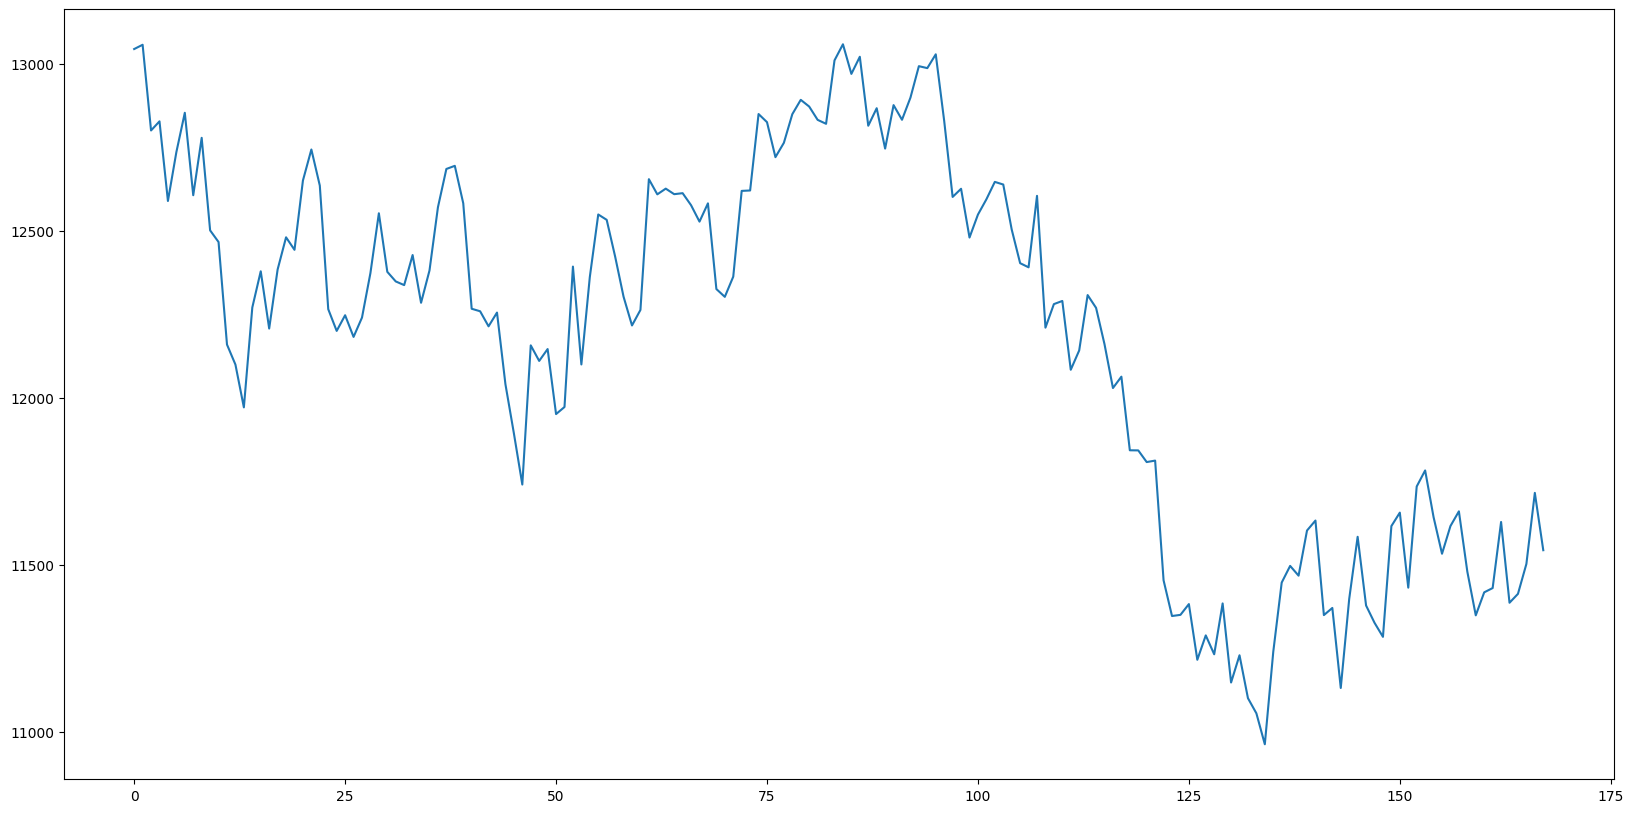

In [90]:
dow_adj_close: np.array = dow.T[5]

plt.figure(figsize = (20,10))
plt.plot(dow_adj_close)

In [91]:
LetsPlot.setup_html()

x_axis: list[int] = list(i for i in range(0, dow_adj_close.size))
y_axis: np.array = dow_adj_close

plot_dict = {'x': x_axis, 'y': y_axis}
(
    ggplot(
        plot_dict, 
        aes(x = 'x', y = 'y')
    )
    + geom_line()
    + ggsize(2000,500)
    + ggtitle('DOW Adj Close')
    + xlab('Day')
    + ylab('Adj Close')
    + theme_classic()
    + flavor_high_contrast_dark()
)

#### Question 10-5. Now over-plot this plot with a `red dot` marker for every day where the dow volume was greater than 5.5 billion.

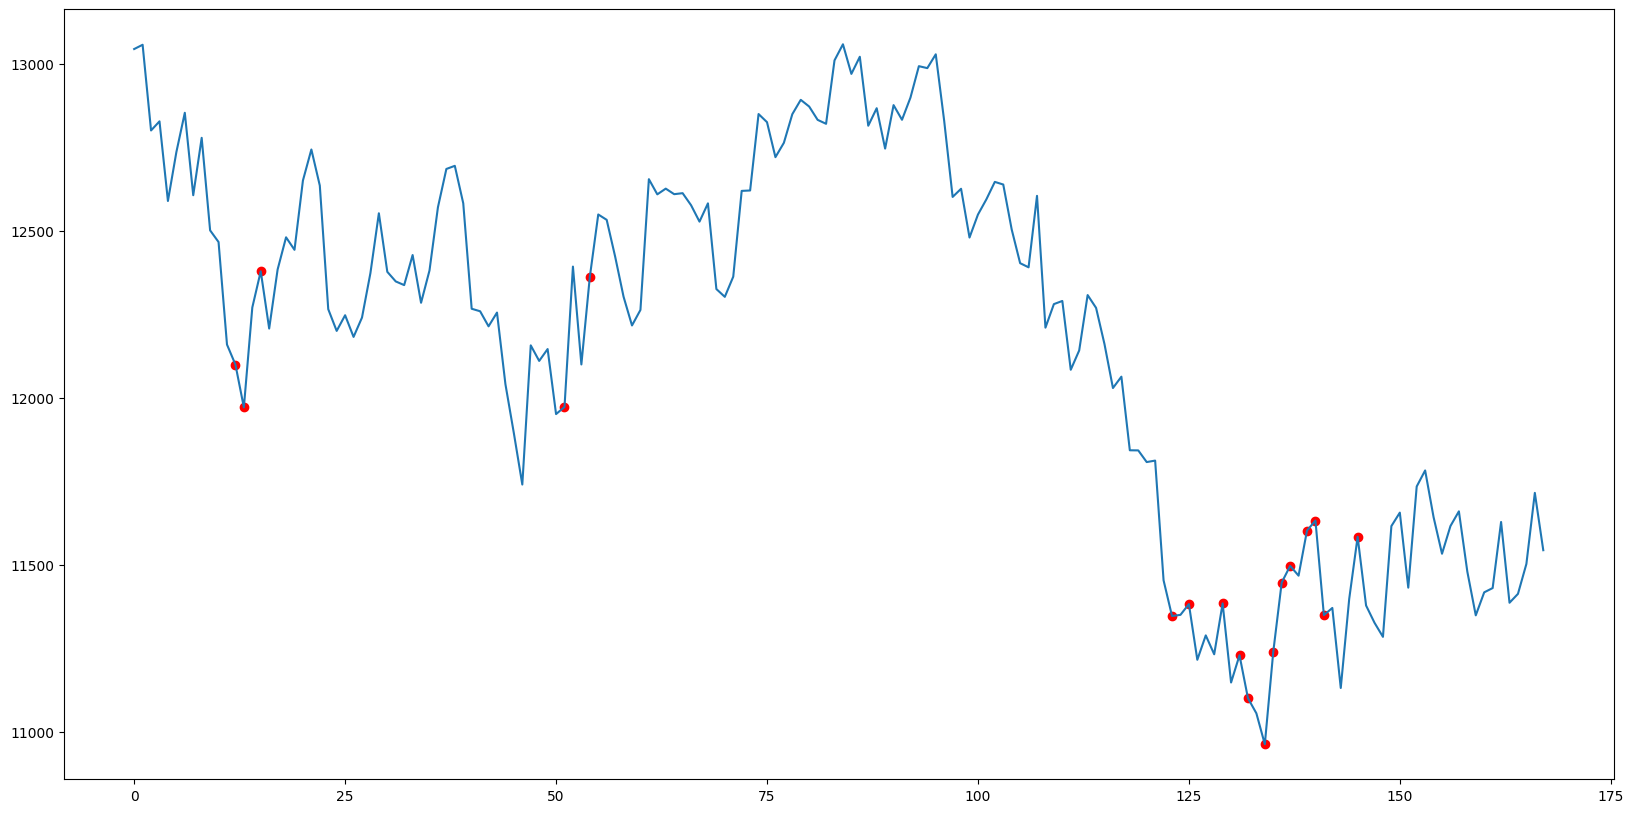

In [92]:
plt.figure(figsize = (20,10))
plt.plot(dow_adj_close)
plt.scatter(
    x = big_volume_index, 
    y = dow_adj_close[big_volume_index],
    color = 'red'
)

In [93]:
(
    ggplot()
    + geom_line(
        aes(x = 'x', y = 'y'), 
        data = plot_dict, 
    )
    + geom_point(
        aes(x = 'x', y = 'y'),
        data = {
            'x': big_volume_index, 
            'y': dow_adj_close[big_volume_index]
        }, 
        color = 'red',
        show_legend=True
    )
    + ggsize(2000,500)
    + ggtitle('DOW Adj Close')
    + xlab('Day')
    + ylab('Adj Close')
    + theme_classic()
    + flavor_high_contrast_dark()
)

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>